<h1 style="font-size:35px;
        color:black;
        ">Quantum Computing Workshop
    </h1>
    <h3 style="font-size:16px"> In diesem Workshop werden wir einige quantenmechanische Grundlagen des Quantencomputings erkunden</h3>

In [38]:
# Wir importieren das IBM Quantencomputing Paket QISKIT #
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer
from qiskit_compat import execute

<h2> 1. Quantenzustände & Messungen </h2> 
<h3> Beim ersten Teil bestimmen wir die quantenmechanischen Zustände eines Qubits indem wir Messungen an dem Quantensystem durchführen </h3>

Wir erstellen dazu zunächst einen QuantenCircuit mit einen Qubit (1,) und einem klassichen Bit (,1)

Der entsprechende Quanten Circuit sieht dann wie unten dargstellt aus. Er besteht aus einem Qubit (q) und einem klassichen Bit (c). Das Qubit ist am Anfang immer im Zustand 0 wie hier durch |0> dargestellt.

In [2]:
# Wir erstellen dazu zunächst einen QuantenCircuit   #
# mit einen Qubit (1,) und einem klassichen Bit (,1) #
QuantenCircuit = QuantumCircuit(1,1)

# Wir setzen das Qubit (0) explizit auf den Zustand |0> #
QuantenCircuit.reset(0)

# Wir zeichnen den Quanten Circuit #
QuantenCircuit.draw()

q: ─|0>─
          
c: 1/═════

Hier werden die geheimen Zustände erstellt -- nur ausführen und nicht hinschauen

In [3]:
# Die geheimen Zustaende A,B werden prepariert #

# Zustand A #
qcA=QuantumCircuit(1);
qcA.x(0)
SetToA= qcA.to_gate()
SetToA.label = "ZustandA"

# Zustand B #
qcB=QuantumCircuit(1);
qcB.h(0);
SetToB= qcB.to_gate()
SetToB.label = "ZustandB"

Nun setzen wir den Quanten Circuit auf Zustand A indem wir die enstrechende Operation (SetToA) durchfuehren

In [4]:
# Wir setzen den Quanten Circuit jetzt auf Zustand A #
QuantenCircuit.append(SetToA,range(1));

# Wir zeichnen den Quanten Circuit #
QuantenCircuit.draw()

┌──────────┐
  q: ─|0>─┤ ZustandA ├
          └──────────┘
c: 1/═════════════════

Damit wir herausfinden können wie der Zustand A aussieht, messen wir den Zustand des ersten Qubits (0,). Der gesamte Quanten Circuit sieht dann also wie unten dargestellt aus.

In [5]:
# Wir messen das Qubit (0,) und schreiben das Ergebnis ins klassiche Bit (,0) #
QuantenCircuit.measure(0,0);
# Wir zeichnen den Quanten Circuit #
QuantenCircuit.draw()

┌──────────┐┌─┐
  q: ─|0>─┤ ZustandA ├┤M├
          └──────────┘└╥┘
c: 1/══════════════════╩═
                       0

Diese Messung führen wir auf einem Quanten Simulator durch, also auf einem klassischen Computer, der einen Quanten Computer simuliert. Da jede Quantenmechanische Messung uns nur einen der Zustaende 0 oder 1 ergeben kann, muessen wir die Messung mehrmals ausfuehren um die entsprechende Wahrscheinlichkeit fuer 0 oder 1 zu bestimmen. Die Messergebnisse fuer 1000 Messungen werden unten angezeigt

Die Messung ergab folgende Ergebnisse  {'1': 1000} mal bei 1000 Versuchen


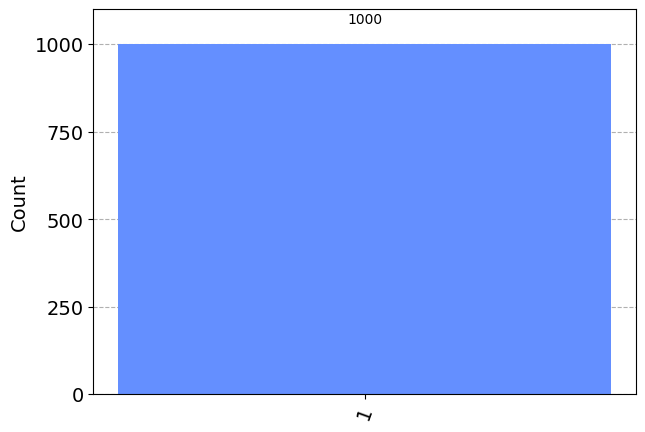

In [6]:
# Erstelle einen Quantensimulator des Typs AER #
QuantenSimulator = Aer.get_backend('aer_simulator')

# Erstelle das Programm fuer den Quantensimulator #
QuantenCircuit = transpile(QuantenCircuit, QuantenSimulator)

# Simulation wird 1000 mal ausgefuehrt und Ergebnisse gespeichert #
SimulationsErgebnis = QuantenSimulator.run(QuantenCircuit, shots=1000)

# Die Messergebnisse werden zusammengefasst, ausgegeben und graphisch dargestellt #
Ergebnis = SimulationsErgebnis.result()
Counts = Ergebnis.get_counts(QuantenCircuit)
print("Die Messung ergab folgende Ergebnisse ",Counts, "mal bei 1000 Versuchen")
plot_histogram(Counts)

Den Zustand können wir uns auch auf der Bloch-Sphere darstellen lassen. Das sieht dann so aus, wir sehen also dass sich das Qubit in diesem Fall immer in Zustand |1> befindet

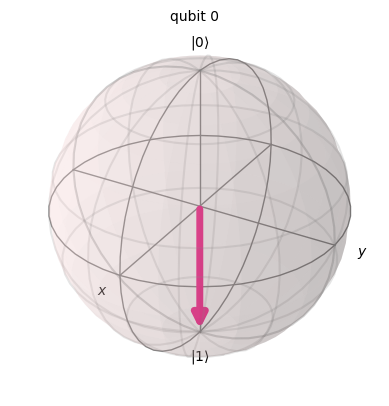

In [7]:
# Wir benutzen einen anderen Simulator, der direkt den Zustand berechnet und diesen # 
# graphisch auf der Bloch-Sphere darstellt                                          #
ZustandsSimulator = Aer.get_backend('statevector_simulator')
Endzustand = execute(QuantenCircuit,ZustandsSimulator).result().get_statevector()
plot_bloch_multivector(Endzustand)

Nun wiederholen wir die gesamte Prozedur, um den Quantenzustand B zu bestimmen. D.h. wir erstellen zunächst einen Quanten Circuit, preparieren den Zustand B, und führen anschliessend eine Messung durch. Der entsprechnde Quantum Circuit ist unten dargestellt.

In [8]:
# Wir erstellen dazu zunächst einen QuantenCircuit   #
# mit einen Qubit (1,) und einem klassichen Bit (,1) #
QuantenCircuit = QuantumCircuit(1,1);

# Wir setzen das Qubit (0) explizit auf den Zustand |0> #
QuantenCircuit.reset(0);

#Wir preparieren Zustand B #
QuantenCircuit.append(SetToB,range(1));

#Wir messen das erste Qubit (0,) und schreiben das Ergebnis ins erste klassiche Bit (,0) #
QuantenCircuit.measure(0,0);

# Wir zeichnen den Quanten Circuit #
QuantenCircuit.draw()


┌──────────┐┌─┐
  q: ─|0>─┤ ZustandB ├┤M├
          └──────────┘└╥┘
c: 1/══════════════════╩═
                       0

Wie vorher auch simulieren wir den Quanten Circuit auf einem klassichen Computer und messen den Zustand des Qubits 1000 mal. Die Ergebnisse der Messung sehen diese mal so aus

Die Messung ergab folgende Ergebnisse  {'0': 492, '1': 508} mal bei 1000 Versuchen


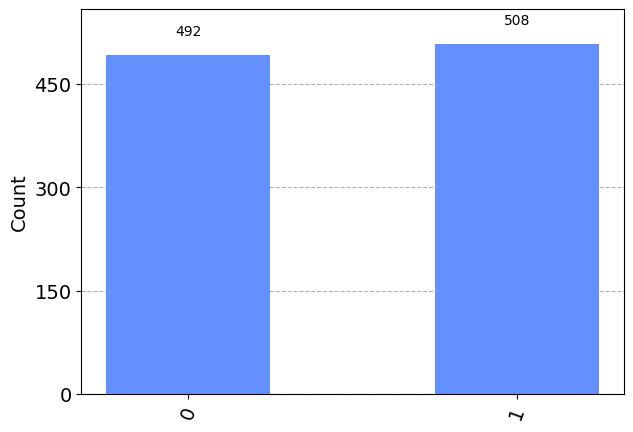

In [9]:
# Erstelle einen Quantensimulator des Typs AER #
QuantenSimulator = Aer.get_backend('aer_simulator')

# Erstelle das Programm fuer den Quantensimulator #
QuantenCircuit = transpile(QuantenCircuit, QuantenSimulator)

# Simulation wird 1000 mal ausgefuehrt und Ergebnisse gespeichert #
SimulationsErgebnis = QuantenSimulator.run(QuantenCircuit, shots=1000)

# Die Messergebnisse werden zusammengefasst, ausgegeben und graphisch dargestellt #
Ergebnis = SimulationsErgebnis.result()
Counts = Ergebnis.get_counts(QuantenCircuit)
print("Die Messung ergab folgende Ergebnisse ",Counts, "mal bei 1000 Versuchen")
plot_histogram(Counts)


<h2> A) Was kann man auf der Grundlage dieser Messung über den Zustand des Quantensystems sagen? </h2> 
<h2> </h2>
<h2> </h2>
<h2> </h2>
<h2> </h2>
<h2> </h2>

Der Zustand ist eine Überlagerung (Superposition) der Zustaende |0> und |1>. Damit wir rausfinden können welche genaue Überlagerung, müssten wir vor der Messung eine Drehung des Qubits durchführen. Wir können uns den Zustand B auch direkt auf der Bloch Sphere veranschaulichen lassen:

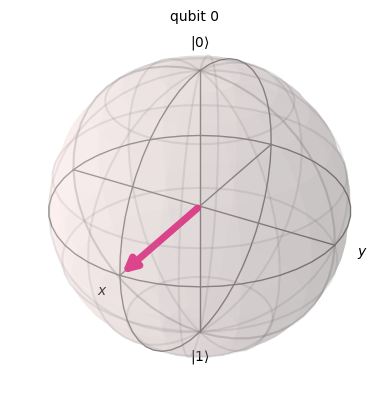

In [10]:
# Wir erstellen zunaechst nochmal einen Quanten Circuit in Zustand B ..  #
QuantenCircuit = QuantumCircuit(1,1);
QuantenCircuit.reset(0);
QuantenCircuit.append(SetToB,range(1));

# .. und visualiseren ihn anschliessend auf der Bloch-Sphere #
ZustandsSimulator = Aer.get_backend('statevector_simulator')
Endzustand = execute(QuantenCircuit,ZustandsSimulator).result().get_statevector()
plot_bloch_multivector(Endzustand)

<h2> Was passiert bei der Messung? </h2> Der Zustand B ist eine Überlagerung der Zustände |0> und |1>. Bei jeder einzelnen Messung des Qubits ergibt sich allerdings, dass das Qubit einen der beiden Zustände |0> oder |1> annimmt. D.h. das Qubit muss sich bei der Messung sozusagen fuer einen der beiden Zustände entscheiden und nimmt dann -- mit der entsprechenden Wahrscheinlichkeit -- diesen Zustand an. Nach der Messung bleibt das Qubit in diesem Zustand, d.h. die quantenmechansiche Messung ändert den Zustand des Systems, man nennt das "Kollaps der Wellenfunktion".

Wir können einfach überprüfen, dass dies tatsaechlich der Fall ist indem wir das Qubit einfach zwei mal hintereinander messen. Wenn sich nichts aendern wuerde waren bei der zweiten Messung |0> und |1> gleich wahrscheinlich, d.h. alle mögliche Kombinationen 00,01,10,11 kämen mit 25% Wahrscheinlichkeit vor. Da die Messung den Zustand aendert, ist dies nicht der Fall. Stattdessen, stimmt das Ergebnis der ersten Messung immer mit dem der zweiten überein, d.h. 00 und 11 sind die einzig möglichen Ergebnisse

In [11]:
# Wir erstellen dazu zunächst einen QuantenCircuit   #
# mit einen Qubit (1,) und zwei klassichen Bits (,2) #
QuantenCircuit = QuantumCircuit(1,2);

# Wir setzen das Qubit (0) explizit auf den Zustand |0> #
QuantenCircuit.reset(0);

#Wir preparieren Zustand B #
QuantenCircuit.append(SetToB,range(1));

#Wir messen das erste Qubit (0,) und schreiben das Ergebnis ins erste klassiche Bit (,0) #
QuantenCircuit.measure(0,0);

#Wir messen das erste Qubit (0,) erneut und schreiben das Ergebnis ins zweite klassiche Bit (,1) #
QuantenCircuit.measure(0,1);

# Wir zeichnen den Quanten Circuit #
QuantenCircuit.draw()

┌──────────┐┌─┐┌─┐
  q: ─|0>─┤ ZustandB ├┤M├┤M├
          └──────────┘└╥┘└╥┘
c: 2/══════════════════╩══╩═
                       0  1

Die Messung ergab folgende Ergebnisse  {'00': 516, '11': 484} mal bei 1000 Versuchen


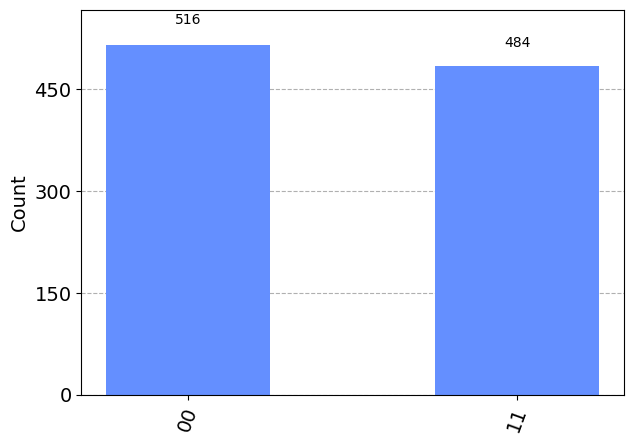

In [12]:
# Erstelle einen Quantensimulator des Typs AER #
QuantenSimulator = Aer.get_backend('aer_simulator')

# Erstelle das Programm fuer den Quantensimulator #
QuantenCircuit = transpile(QuantenCircuit, QuantenSimulator)

# Simulation wird 1000 mal ausgefuehrt und Ergebnisse gespeichert #
SimulationsErgebnis = QuantenSimulator.run(QuantenCircuit, shots=1000)

# Die Messergebnisse werden zusammengefasst, ausgegeben und graphisch dargestellt #
Ergebnis = SimulationsErgebnis.result()
Counts = Ergebnis.get_counts(QuantenCircuit)
print("Die Messung ergab folgende Ergebnisse ",Counts, "mal bei 1000 Versuchen")
plot_histogram(Counts)

<h2> B) Wie können wir das Ergebnis der Messung verstehen? </h2> 
<h2> </h2>
<h2> </h2>
<h2> </h2>
<h2> </h2>

Wenn sich nichts aendern wuerde waren bei der zweiten Messung |0> und |1> gleich wahrscheinlich, d.h. alle mögliche Kombinationen 00,01,10,11 kämen mit 25% Wahrscheinlichkeit vor. Da die Messung den Zustand aendert, ist dies nicht der Fall. Stattdessen, stimmt das Ergebnis der ersten Messung immer mit dem der zweiten überein, d.h. 00 und 11 sind die einzig möglichen Ergebnisse. 

Dies sehen wir auch wenn wir uns den Zustand des Qubits auf der Bloch-Sphere anschauen. Die linke Grafik zeigt -- wie oben -- den Zustand vor der Messung. Die rechte Grafik zeigt, dass der Zustand nach der Messung auf einen der beiden Zustände |0> oder |1> kollabiert ist.

In [13]:
# Wir erstellen zeinen Quanten Circuit aus zwei Qubits
# und setzen beide in Zustand B ..  #
QuantenCircuit = QuantumCircuit(2,1);
QuantenCircuit.reset([0,1]);
QuantenCircuit.append(SetToB,[0]);
QuantenCircuit.append(SetToB,[1]);

# .. das erste Qubit lassen wir unangetastet ...#
# .. das zweite Qubit (1,) messen wir und schreiben das Ergebnis ins erste klassiche bit (,0) ... #
QuantenCircuit.measure(1,0);
QuantenCircuit.draw()

┌──────────┐   
q_0: ─|0>─┤ ZustandB ├───
          ├──────────┤┌─┐
q_1: ─|0>─┤ ZustandB ├┤M├
          └──────────┘└╥┘
c: 1/══════════════════╩═
                       0

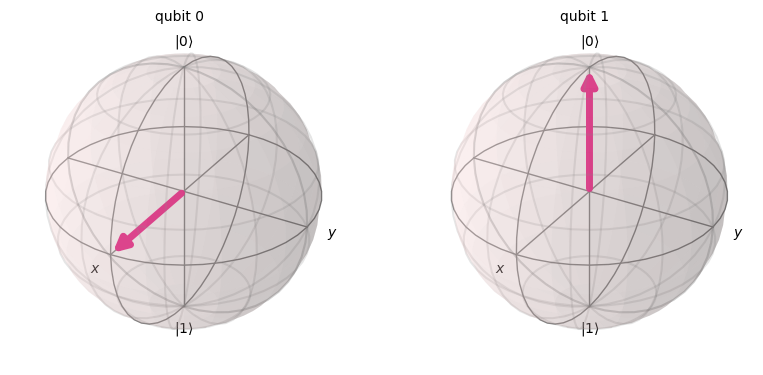

In [14]:
# .. und visualiseren ihn anschliessend auf der Bloch-Sphere .. #
ZustandsSimulator = Aer.get_backend('statevector_simulator')
Endzustand = execute(QuantenCircuit,ZustandsSimulator).result().get_statevector()
plot_bloch_multivector(Endzustand,title='')

<h2> 2. Entanglement & verschränkte Zustände </h2> 
<h3> Beim zweiten Teil lernen wir eine weitere Besonderheit von Quantenzuständen kennen. </h3>

Eine weitere Besonderheit von Quantenzuständen, die kein klassisches Analogon besitzt ist, dass zwei (oder mehrere) Qubits miteinander verschränkt sein können, so dass die Messung eines der beiden Quantenzustände automatisch den anderen Zustand festlegt.

Wir können einen solchen Zustand in zwei Schritten erzeugen:

1) Das erste Qubit (0,) wird zunächst in eine Superposition aus |0> und |1> versetz.
2) Das zweite Qubit (1,) wird ausgehend vom Zustand |0>, durch ein bedingtes Quantengate (das cnot gate), geflippt wenn der Zustand des ersten Qubits |1> ist. 

Das Ergebnis dieser Operation ist eine Überlagerung der Zustaende |00> und |11>, d.h. sobald ein Qubit gemessen wird ist klar, dass sich das andere Qubit im gleichen Quantenzustand befindet.

In [15]:
# Wir erstellen eine Quanten Circuit mit 2 Qubits (2,) 
QuantenCircuit = QuantumCircuit(2,0);
QuantenCircuit.reset([0,1]);

# Wir erstellen einen verschraenkten Zustand indem wir zunaechst das erste Qubit (0)
# durch ein H-Gate in eine Ueberlagerung aus Zustaenden |0> und |1> bringen ...
QuantenCircuit.h(0);

# ...und anschliessend mit dem CNOT-Gate einen Flip des zeiten Gate (,1) ausfuehren,
# wenn sich das erste Qubit (0,) -- das sog. Kontrollqubit -- im Zustand |1> befindet.
QuantenCircuit.cx(0,1);

# Wir zeichnen den Quanten Circuit #
QuantenCircuit.draw()

┌───┐     
q_0: ─|0>─┤ H ├──■──
          └───┘┌─┴─┐
q_1: ─|0>──────┤ X ├
               └───┘

Wenn wir einen solchen Zustand preparieren und **das erste Qubit** messen erhalten wir folgendes Ergebnis

In [16]:
# Wir erstellen eine Quanten Circuit mit 2 Qubits (2,) und einem klassischen Bits (,1)
QuantenCircuit = QuantumCircuit(2,1);
QuantenCircuit.reset([0,1]);

# Wir erstellen einen verschraenkten Zustand indem wir zunaechst das erste Qubit (0)
# in eine Ueberlagerung aus Zustaenden 
QuantenCircuit.h(0);
QuantenCircuit.cx(0,1);

QuantenCircuit.measure(0,0);
QuantenCircuit.draw()

┌───┐     ┌─┐
q_0: ─|0>─┤ H ├──■──┤M├
          └───┘┌─┴─┐└╥┘
q_1: ─|0>──────┤ X ├─╫─
               └───┘ ║ 
c: 1/════════════════╩═
                     0

Die Messung des ersten Qubits ergab folgende Ergebnisse  {'0': 484, '1': 516} mal bei 1000 Versuchen


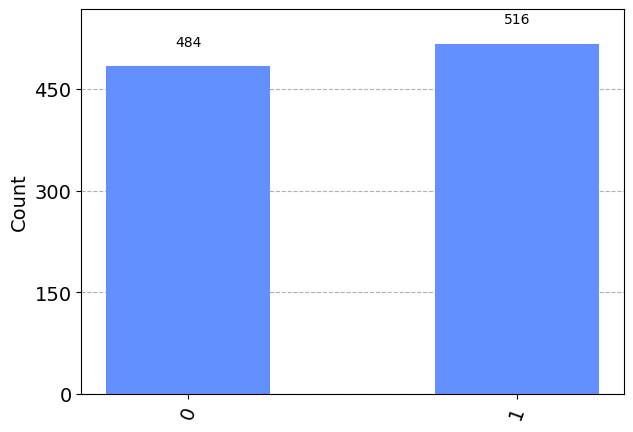

In [17]:
# Erstelle einen Quantensimulator des Typs AER #
QuantenSimulator = Aer.get_backend('aer_simulator')

# Erstelle das Programm fuer den Quantensimulator #
QuantenCircuit = transpile(QuantenCircuit, QuantenSimulator)

# Simulation wird 1000 mal ausgefuehrt und Ergebnisse gespeichert #
SimulationsErgebnis = QuantenSimulator.run(QuantenCircuit, shots=1000)

# Die Messergebnisse werden zusammengefasst, ausgegeben und graphisch dargestellt #
Ergebnis = SimulationsErgebnis.result()
Counts = Ergebnis.get_counts(QuantenCircuit)
print("Die Messung des ersten Qubits ergab folgende Ergebnisse ",Counts, "mal bei 1000 Versuchen")
plot_histogram(Counts)

Wenn wir einen solchen Zustand preparieren und **das zweite Qubit** messen erhalten wir folgendes Ergebnis

In [18]:
# Wir erstellen eine Quanten Circuit mit 2 Qubits (2,) und einem klassischen Bits (,1)
QuantenCircuit = QuantumCircuit(2,1);
QuantenCircuit.reset([0,1]);

# Wir erstellen einen verschraenkten Zustand indem wir zunaechst das erste Qubit (0)
# in eine Ueberlagerung aus Zustaenden 
QuantenCircuit.h(0);
QuantenCircuit.cx(0,1);

QuantenCircuit.measure(1,0);
QuantenCircuit.draw()

┌───┐        
q_0: ─|0>─┤ H ├──■─────
          └───┘┌─┴─┐┌─┐
q_1: ─|0>──────┤ X ├┤M├
               └───┘└╥┘
c: 1/════════════════╩═
                     0

Die Messung des zweiten Qubits ergab folgende Ergebnisse  {'0': 506, '1': 494} mal bei 1000 Versuchen


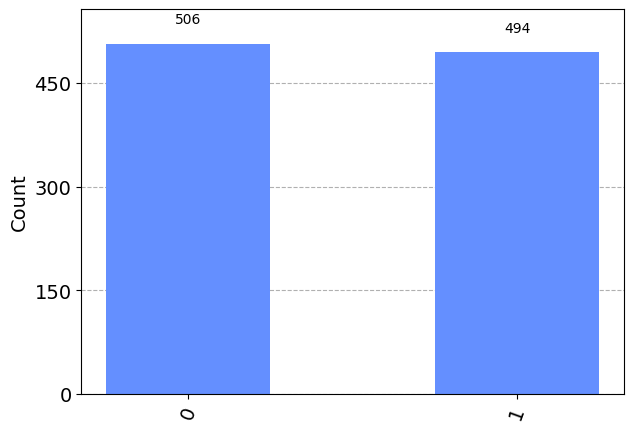

In [19]:
# Erstelle einen Quantensimulator des Typs AER #
QuantenSimulator = Aer.get_backend('aer_simulator')

# Erstelle das Programm fuer den Quantensimulator #
QuantenCircuit = transpile(QuantenCircuit, QuantenSimulator)

# Simulation wird 1000 mal ausgefuehrt und Ergebnisse gespeichert #
SimulationsErgebnis = QuantenSimulator.run(QuantenCircuit, shots=1000)

# Die Messergebnisse werden zusammengefasst, ausgegeben und graphisch dargestellt #
Ergebnis = SimulationsErgebnis.result()
Counts = Ergebnis.get_counts(QuantenCircuit)
print("Die Messung des zweiten Qubits ergab folgende Ergebnisse ",Counts, "mal bei 1000 Versuchen")
plot_histogram(Counts)

Wenn wir einen solchen Zustand preparieren und **beide Qubits** messen erhalten wir folgendes Ergebnis

In [20]:
# Wir erstellen eine Quanten Circuit mit 2 Qubits (2,) und einem klassischen Bits (,1)
QuantenCircuit = QuantumCircuit(2,2);
QuantenCircuit.reset([0,1]);

# Wir erstellen einen verschraenkten Zustand indem wir zunaechst das erste Qubit (0)
# in eine Ueberlagerung aus Zustaenden 
QuantenCircuit.h(0);
QuantenCircuit.cx(0,1);

QuantenCircuit.measure(0,0);
QuantenCircuit.measure(1,1);

QuantenCircuit.draw()

┌───┐     ┌─┐   
q_0: ─|0>─┤ H ├──■──┤M├───
          └───┘┌─┴─┐└╥┘┌─┐
q_1: ─|0>──────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1

Die Messung der beiden Qubits ergab folgende Ergebnisse  {'11': 483, '00': 517} mal bei 1000 Versuchen


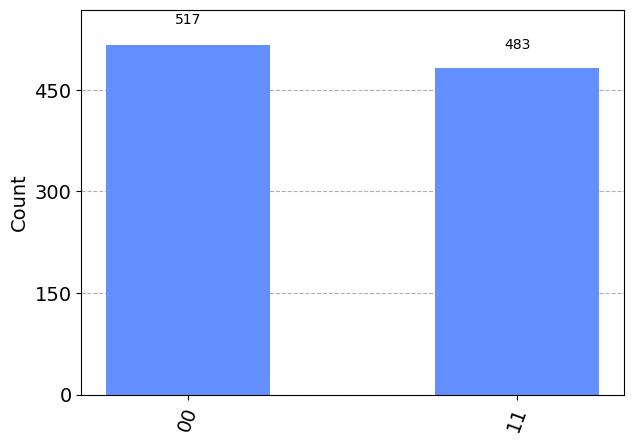

In [21]:
# Erstelle einen Quantensimulator des Typs AER #
QuantenSimulator = Aer.get_backend('aer_simulator')

# Erstelle das Programm fuer den Quantensimulator #
QuantenCircuit = transpile(QuantenCircuit, QuantenSimulator)

# Simulation wird 1000 mal ausgefuehrt und Ergebnisse gespeichert #
SimulationsErgebnis = QuantenSimulator.run(QuantenCircuit, shots=1000)

# Die Messergebnisse werden zusammengefasst, ausgegeben und graphisch dargestellt #
Ergebnis = SimulationsErgebnis.result()
Counts = Ergebnis.get_counts(QuantenCircuit)
print("Die Messung der beiden Qubits ergab folgende Ergebnisse ",Counts, "mal bei 1000 Versuchen")
plot_histogram(Counts)

<h2> C) Wie können wir die Ergebnisse der Messungen verstehen? </h2> 
<h2> </h2>
<h2> </h2>
<h2> </h2>
<h2> </h2>

Wenn wir ein einzelnes Qubit messen, so sind jeweils beide Zustaende |0> und |1> gleich wahrscheinlich. Wenn wir beide Qubits messen, so ist durch die Verschränkung des Zustands der Zustand des anderne Qubits festgelegt. Desegen sind '00' und '11' die einzig möglichen Messergebnisse. Beide Ergebnisse sind gleich wahrscheinlich.

<h2> 3. Quanten Algorithmen </h2>
<h3> Beim letzten Teil lernen wir an Hand des sogenannten Grover Algorithmus die Konzepte von Interferenz und Quanten Parallelismus kennen. Durch den geschickten Einsatz dieser Konzepte können Quantencomputer einige Aufgaben wesentlich effizienter erledigen als klassiche Computer.</h3>

Der Grover Algorithmus dient dazu ein Element in einer Liste zu finden das eine besondere Eigenschaft hat, also z.B. das Element X in der Liste {o,o,X,o,o,o,o,o}. Der Ausgangspunkt ist zunächst ein sogenanntes Orakel, ein Quantengate das genau dieses Element in der Liste markiert. 

Wir definieren uns zunächst ein solches Orakel, indem wir einen Quanten Circuit konstruieren der zufällig ein Element aus einer Liste von acht Elementen markiert. Dazu wählen wir zunächst mit einem klassischen Zufallsgenerator ein beliebiges Element aus, und führen anschliessend die entsprechenden Operationen aus, um genau diesen Zustand mit -1 zu multiplizieren. Der entsprechende Quanten Circuit ist relativ kompliziert, die Details müssen uns hier aber nicht interessieren.

In [44]:
# Setze Anzahl der Elemente NElements=8 und Anzahl der benoetigten Qubits NQubits=3 #
# so dass alle Elemente dargestellt werden koennen also, 2^NQubits >= NElements ist #
NElements = 8; NQubits = int(np.log2(NElements)); 

In [66]:
#Erzeuge Oracle, dass zufällig eines Element auswählt #

#Erzeuge Quanten Circuit mit NQubits Qubits #
QuantenRegister=QuantumRegister(NQubits)
QuantenCircuit = QuantumCircuit(QuantenRegister, name='Oracle');

# Bestimme das zufällige Element in Binärdarstellung Element=xS+2*yS+4*zS #
xS=np.random.randint(0,2);
yS=np.random.randint(0,2);
zS=np.random.randint(0,2);

# Verwende Bit flips entsprechend Binaerdarstellung  
if(xS==0):
    QuantenCircuit.x(0)
if(yS==0):
    QuantenCircuit.x(1)
if(zS==0):
    QuantenCircuit.x(2)
    
    
# Verwende Multi-Controlled Z-Gate um den Faktor -1 zu erzeugen  #    
# Neue Implementation von Multi-Controlled Z durch Multi-Controlled X Gate und Basiswechsel #
QuantenCircuit.h(NQubits - 1)
QuantenCircuit.mcx(list(range(NQubits - 1)), NQubits - 1)
QuantenCircuit.h(NQubits - 1)

# Verwende Bit flips entsprechend Binaerdarstellung 
if(zS==0):
    QuantenCircuit.x(2)
if(yS==0):    
    QuantenCircuit.x(1)
if(xS==0):
    QuantenCircuit.x(0)

Diesen Quanten Circuit nennen wir ab jetzt unser Orakel.

In [67]:
#Definiere diesen Cirucit als unser Orakel #
Orakel = QuantenCircuit.to_gate();
Orakel.label = "Orakel";

Bei der **klassichen Bestimmung** des "besonderen" Elements wuerde man einfach **nacheinander alle Elemente** der Liste durchgehen und überprüfen ob Sie "besonders" sind. Der Vorteil des Quantencomputers ist dass wir durch eine Überlagerung von Zuständen mit Hilfe des Orakels  **alle Elemente gleichzeitig** überprüfen können. Damit wir diesen **Quantenparallelismus** ausnützen können preparieren wir zunächst eine Superposition aller Zustände

In [68]:
#Erzeuge einen Quantencircuit mit NQubits Qubits (NQubits,) und genauso vielen klassichen Bits (,NQubits) #
QuantenCircuit=QuantumCircuit(NQubits,NQubits);

#Erzeuge eine Superpositions aller Zustände #
QuantenCircuit.reset(range(NQubits))
QuantenCircuit.h(range(NQubits));

#Wir messen die Qubits ([0...NQubits-1],) und schreiben das Ergebnis in die klassichen Bits (,[0...NQubits-1]) #
QuantenCircuit.measure(range(NQubits),range(NQubits));

QuantenCircuit.draw()

┌───┐┌─┐      
q_0: ─|0>─┤ H ├┤M├──────
          ├───┤└╥┘┌─┐   
q_1: ─|0>─┤ H ├─╫─┤M├───
          ├───┤ ║ └╥┘┌─┐
q_2: ─|0>─┤ H ├─╫──╫─┤M├
          └───┘ ║  ║ └╥┘
c: 3/═══════════╩══╩══╩═
                0  1  2

Wenn wir nun den Zustand messen sind alle Zustände gleich wahrscheinlich

Die Messung ergab folgende Ergebnisse  {'011': 129, '010': 140, '101': 110, '111': 133, '110': 117, '100': 145, '000': 105, '001': 121} mal bei 1000 Versuchen


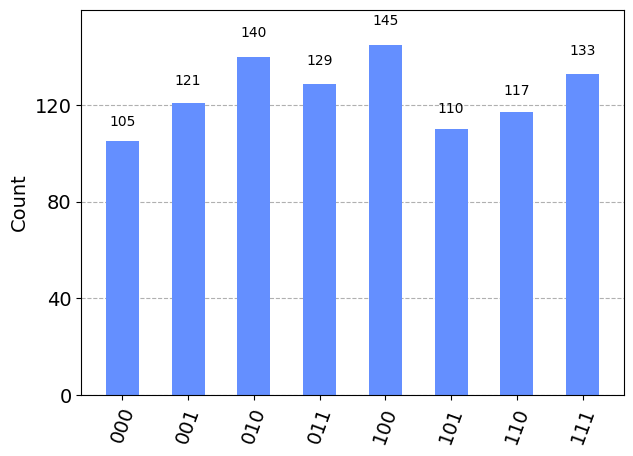

In [69]:
# Erstelle einen Quantensimulator des Typs AER #
QuantenSimulator = Aer.get_backend('aer_simulator')

# Erstelle das Programm fuer den Quantensimulator #
QuantenCircuit = transpile(QuantenCircuit, QuantenSimulator)

# Simulation wird 1000 mal ausgefuehrt und Ergebnisse gespeichert #
SimulationsErgebnis = QuantenSimulator.run(QuantenCircuit, shots=1000)

# Die Messergebnisse werden zusammengefasst, ausgegeben und graphisch dargestellt #
Ergebnis = SimulationsErgebnis.result()
Counts = Ergebnis.get_counts(QuantenCircuit)
print("Die Messung ergab folgende Ergebnisse ",Counts, "mal bei 1000 Versuchen")
plot_histogram(Counts)

Der sogenannte Grover Algorithmus verwendet nun das Orakel zusammen mit einer weiteren Manipulation des Quantenzustands um **konstruktive Interferenz fuer das markierte Element** und **destruktive Interferenz fuer alle unmarkierten Elemente** herzustellen. Der Algorithmus wird hier definiert, die genauen Details sind für uns erstmal nicht interessant.

In [70]:
GroverCircuit=QuantumCircuit(NQubits)
GroverCircuit.append(Orakel, range(NQubits))

# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(NQubits):
    GroverCircuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(NQubits):
    GroverCircuit.x(qubit)
# Do multi-controlled-Z gate
GroverCircuit.h(NQubits-1)
GroverCircuit.mcx(list(range(NQubits-1)), NQubits-1)  # multi-controlled-toffoli
GroverCircuit.h(NQubits-1)
# Apply transformation |11..1> -> |00..0>
for qubit in range(NQubits):
    GroverCircuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(NQubits):
    GroverCircuit.h(qubit)
####

# Create controlled-Grover
Grover = GroverCircuit.to_gate()
Grover.label = "Grover"

Wenn wir nun vor der Messung einen Grover Schritt einführen ...

In [71]:
#Erzeuge einen Quantencircuit mit NQubits Qubits (NQubits,) und genauso vielen klassichen Bits (,NQubits) #
QuantenCircuit=QuantumCircuit(NQubits,NQubits);

#Erzeuge eine Superpositions aller Zustände #
QuantenCircuit.reset(range(NQubits))
QuantenCircuit.h(range(NQubits));

# Wende eine Iteration des Grover Algorithmus an #
QuantenCircuit.append(Grover,range(NQubits));

#Wir messen die Qubits ([0...NQubits-1],) und schreiben das Ergebnis in die klassichen Bits (,[0...NQubits-1]) #
QuantenCircuit.measure(range(NQubits),range(NQubits));
QuantenCircuit.draw()

┌───┐┌─────────┐┌─┐      
q_0: ─|0>─┤ H ├┤0        ├┤M├──────
          ├───┤│         │└╥┘┌─┐   
q_1: ─|0>─┤ H ├┤1 Grover ├─╫─┤M├───
          ├───┤│         │ ║ └╥┘┌─┐
q_2: ─|0>─┤ H ├┤2        ├─╫──╫─┤M├
          └───┘└─────────┘ ║  ║ └╥┘
c: 3/══════════════════════╩══╩══╩═
                           0  1  2

... erhalten wir die folgenden Messergebnisse

Die Messung ergab folgende Ergebnisse  {'111': 33, '011': 28, '110': 36, '100': 31, '010': 767, '101': 37, '001': 40, '000': 28} mal bei 1000 Versuchen


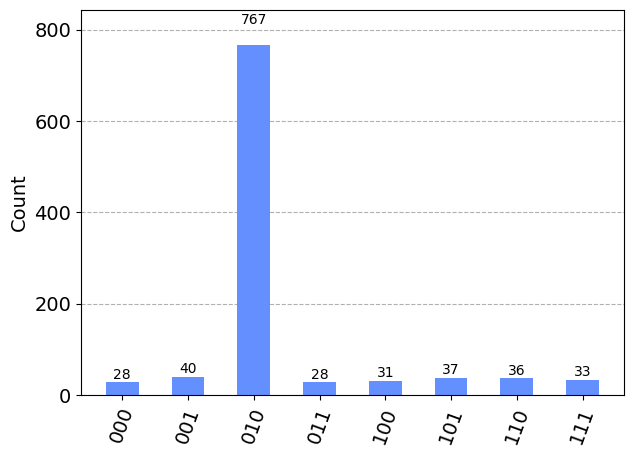

In [72]:
# Bestimme den Zustand aller Qubits und schreibe in klassische Bits #
QuantenCircuit.measure(range(NQubits),range(NQubits));

# Erstelle einen Quantensimulator des Typs AER #
QuantenSimulator = Aer.get_backend('aer_simulator')

# Erstelle das Programm fuer den Quantensimulator #
QuantenCircuit = transpile(QuantenCircuit, QuantenSimulator)

# Simulation wird 1000 mal ausgefuehrt und Ergebnisse gespeichert #
SimulationsErgebnis = QuantenSimulator.run(QuantenCircuit, shots=1000)

# Die Messergebnisse werden zusammengefasst, ausgegeben und graphisch dargestellt #
Ergebnis = SimulationsErgebnis.result()
Counts = Ergebnis.get_counts(QuantenCircuit)
print("Die Messung ergab folgende Ergebnisse ",Counts, "mal bei 1000 Versuchen")
plot_histogram(Counts)

<h2> D) Wie können wir die Ergebnisse der Messungen verstehen? Welches ist das markierte Element? </h2> 
<h2> </h2>
<h2> </h2>
<h2> </h2>
<h2> </h2>

Die konstruktive Interferenz für das markierte Element führt dazu, dass die Wahrscheinlichkeit dieses Element zu finden erhöht wird, wohingegen die destruktive Interferenz fuer alle unmarkierten Elemente dazu führt, dass die Wahrscheinlichkeit diese Elemente zu finden geringer wird. Das markierte Element ist also das mit der grössten Wahrscheinlichkeit

In [73]:
print("Das ausgewählte Qubit ist:", zS,yS,xS, "bzw. das",xS+2*yS+4*zS,"te-Element in der Liste")

Das ausgewählte Qubit ist: 0 1 0 bzw. das 2 te-Element in der Liste


<h2> Spielwiese </h2>
<h3> Hier kann einfach ausprobiert werden. </h3>

In [82]:
# Wir schauen uns an was verschiedene Gates mit einem Qubit machen #
QuantenCircuit=QuantumCircuit(1,1);
QuantenCircuit.rx(np.pi/3,0);
QuantenCircuit.h(0);
QuantenCircuit.rx(np.pi/3,0);
QuantenCircuit.rz(np.pi/3,0);

# Wir benutzen einen anderen Simulator, der direkt den Zustand berechnet # 
ZustandsSimulator = Aer.get_backend('statevector_simulator')
Endzustand = execute(QuantenCircuit,ZustandsSimulator).result().get_statevector(decimals=3)



In [84]:
# Den Endzustand koennen wir angeben ... ##
from qiskit.visualization import array_to_latex
array_to_latex(Endzustand.data, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

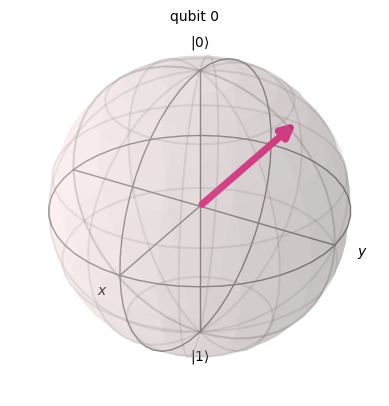

In [85]:
## .. oder graphisch auf der Blochspaere darstellen ##
plot_bloch_multivector(Endzustand)